# Bank Churn Prediction_Project_GAP

By: Glen A Patterson

Date: 1-25-2023

## Problem Statment:

Businesses like banks that provide service have to worry about the problem of 'Churn' (customers leaving and joining another service provider). It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

## Objective:

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

## Data Dictionary:

**CustomerId:** Unique ID which is assigned to each customer

**Surname:** Last name of the customer 

**CreditScore:** It defines the credit history of the customer.

**Geography:** A customer’s location 

**Gender:** It defines the Gender of the customer

**Age:** Age of the customer

**Tenure:** Number of years for which the customer has been with the 
bank

**NumOfProducts:** It refers to the number of products that a customer has purchased through the bank.

**Balance:** Account balance

**HasCrCard:** It is a categorical variable that decides whether the customer has a credit card or not.

**EstimatedSalary:** Estimated salary 

**IsActiveMember:** It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )

**Exited:** It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 
                   
  - **0 = "No"** ( Customer did not leave the bank )

  - **1 = "Yes"** ( Customer left the bank )

## Importing the necessary libraries:

In [1]:
# Libraries to help read, save, and manipulate data
import numpy as np
import pandas as pd
# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
sns.set()
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings("ignore")
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 300)
# To split the data into train and test
from sklearn.model_selection import train_test_split
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
# Importing tensorflow library
import tensorflow as tf
# importing different functions to build models
from tensorflow.keras.layers import Dense, Dropout,InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend
# Importing Batch Normalization
from keras.layers import BatchNormalization
# Importing optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
# To check model performance
from sklearn import metrics
# To get diferent metric scores
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc, roc_curve
from sklearn import model_selection

## Read and Explore the dataset:

In [2]:
#mouting the drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# Defining the path of the dataset
dataset_file = '/content/drive/MyDrive/AIML/Week 23 (Project_07)/Churn.csv'

In [4]:
# Reading dataset
ChurnData = pd.read_csv(dataset_file)
# Make copy of ChurnData and call the dataset data
data=ChurnData.copy()
# Displaying the first 5 rows
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [5]:
# Drop the column RowNumber as it is not needed
data.drop("RowNumber", axis=1, inplace=True)

In [6]:
# Check for duplicated rows
data.duplicated().sum()

0

- There is no duplicated rows in the dataset

In [7]:
# Dropping the columns CustomerId and Surname because we don't need this data to evaluate Churn for bank
data.drop(["CustomerId", "Surname"], axis=1, inplace=True)

In [8]:
# Get information about the number of rows and columns in the dataset (rows, columns)
data.shape

(10000, 11)

- We can see that there is 10,000 rows and 11 columns

In [9]:
# Information on dataset (data types, format, missing data, ect.)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


- There is no missing data in this dataset
- There is 859.5KB memory used
- There is two "float64", seven "int64", and two "object" data types

In [10]:
# Explore the Statistics in data and look for outliers in dataset
data.describe().T

count           mean           std     min       25%  \
CreditScore      10000.0     650.528800     96.653299  350.00    584.00   
Age              10000.0      38.921800     10.487806   18.00     32.00   
Tenure           10000.0       5.012800      2.892174    0.00      3.00   
Balance          10000.0   76485.889288  62397.405202    0.00      0.00   
NumOfProducts    10000.0       1.530200      0.581654    1.00      1.00   
HasCrCard        10000.0       0.705500      0.455840    0.00      0.00   
IsActiveMember   10000.0       0.515100      0.499797    0.00      0.00   
EstimatedSalary  10000.0  100090.239881  57510.492818   11.58  51002.11   
Exited           10000.0       0.203700      0.402769    0.00      0.00   

                        50%          75%        max  
CreditScore         652.000     718.0000     850.00  
Age                  37.000      44.0000      92.00  
Tenure                5.000       7.0000      10.00  
Balance           97198.540  127644.2400  250898.09  
NumOfProducts         1.000       2.0000       4.00  
HasCrCard             1.000       1.0000       1.00  
IsActiveMember        1.000       1.0000       1.00  
EstimatedSalary  100193.915  149388.2475  199992.48  
Exited                0.000       0.0000       1.00

In [11]:
# Check the different number of category types and there value counts in the dataset
print(data.Geography.value_counts())
print(data.Gender.value_counts())

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
Male      5457
Female    4543
Name: Gender, dtype: int64


## Exploratory Data Analysis

### Univariate analysis:

In [12]:
# function to create labeled barplots
def labeled_barplot(data, feature, figuresize=3, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, figuresize * 6))
    else:
        plt.figure(figsize=(n + 2, figuresize * 6))

    plt.xticks(rotation=90, fontsize=figuresize * 16)
    plt.yticks(fontsize=figuresize * 16)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=25,
            xytext=(0, 10),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


# This is a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**Observation on CreditScore**

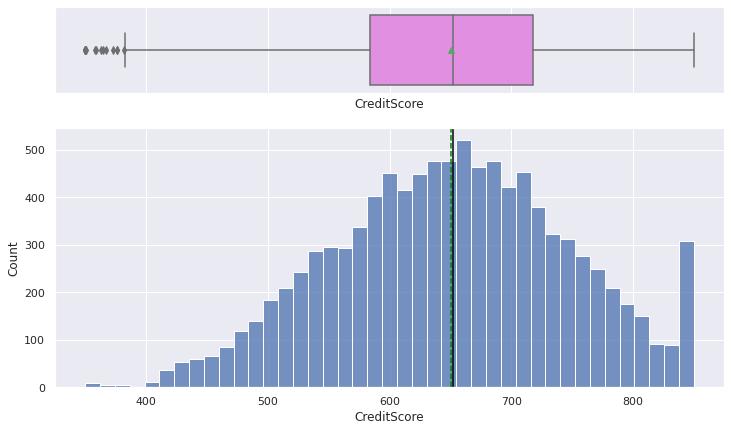

In [13]:
histogram_boxplot(data, "CreditScore")

- The Median credit score is 652, the lowest credit score is 350 and the highest credit score is 850.
- The IQR is between 584 and 718 with a mean of 651
- There is some outliers in credit score
- The credit score has a normal distribution

**Observation on Geography**

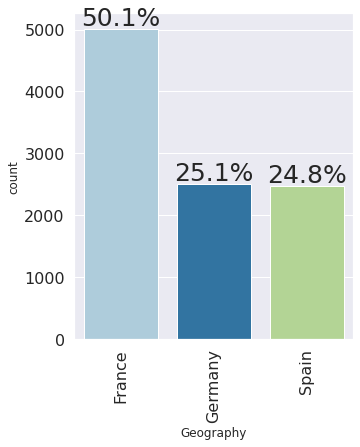

In [14]:
labeled_barplot(data, "Geography", 1, perc=True)

- 50.1% of the customers live in France
- 25.1% of the customers live in Germany
- 24.8% of the customers live in Spain

**Observation on Gender**

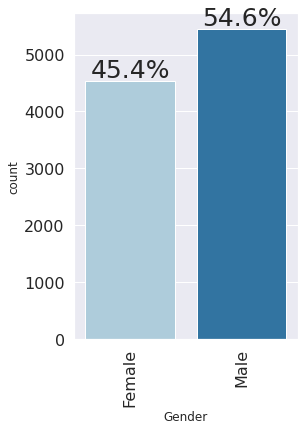

In [15]:
labeled_barplot(data, "Gender", 1, perc=True)

- 45.4% of the customers are Female
- 54.6% of the customers are Male

**Observation on Age**

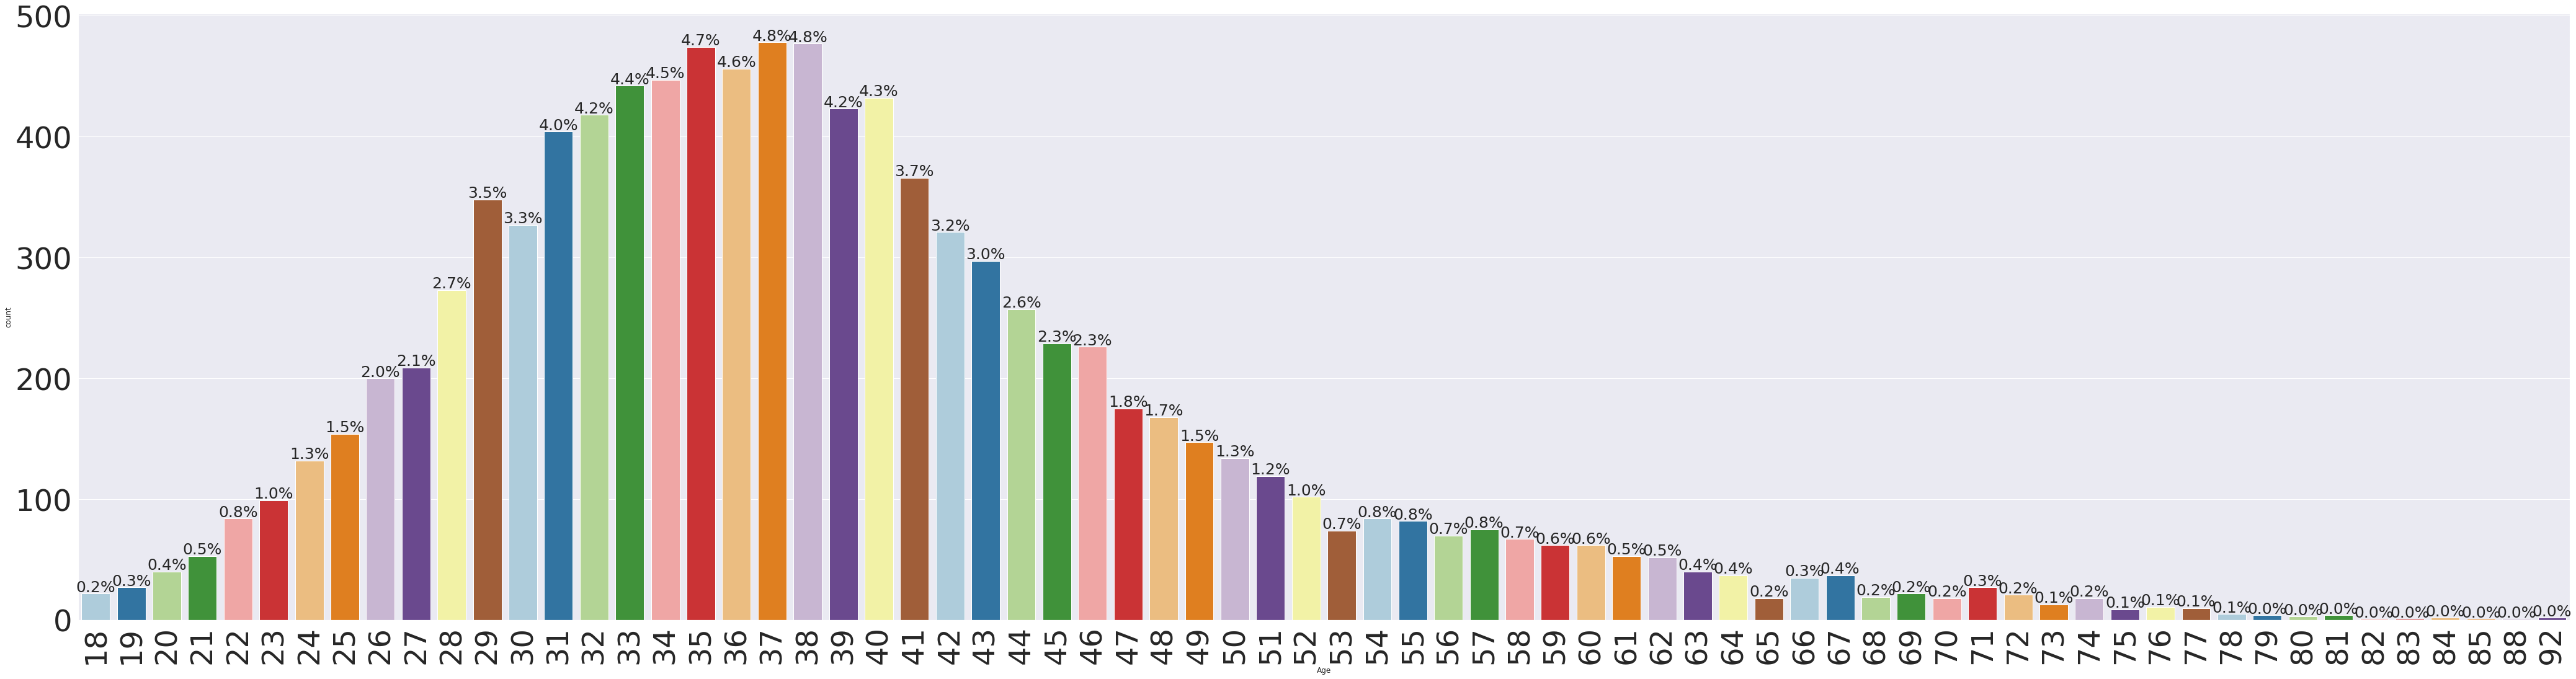

In [16]:
labeled_barplot(data, "Age", perc=True)

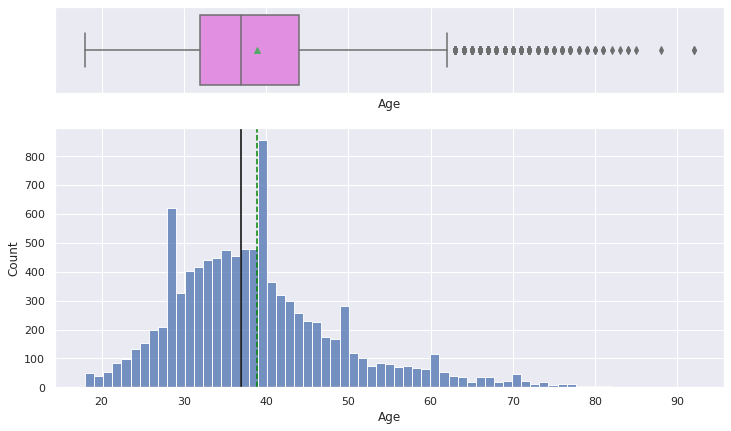

In [17]:
histogram_boxplot(data, "Age")

- The Median Age is 37 years old, youngest age is 18 and oldest is 92 years old
- The IQR is between age 32 and 44 with a mean of 39
- There is some outliers in age over 61 years old
- Age is right skewed

**Observation on Tenure**

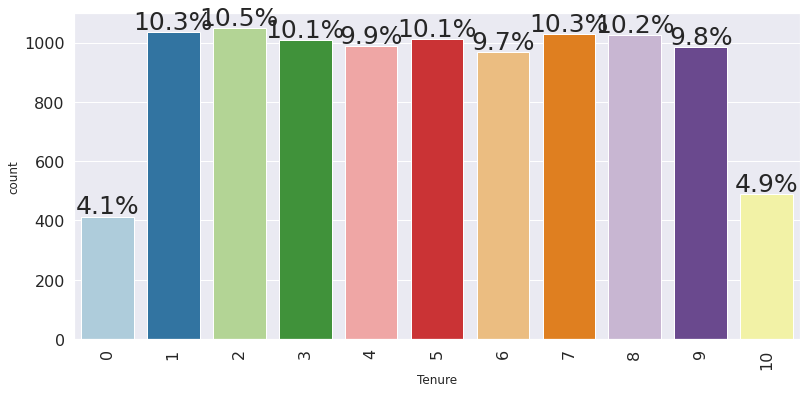

In [18]:
labeled_barplot(data, "Tenure", 1, perc=True)

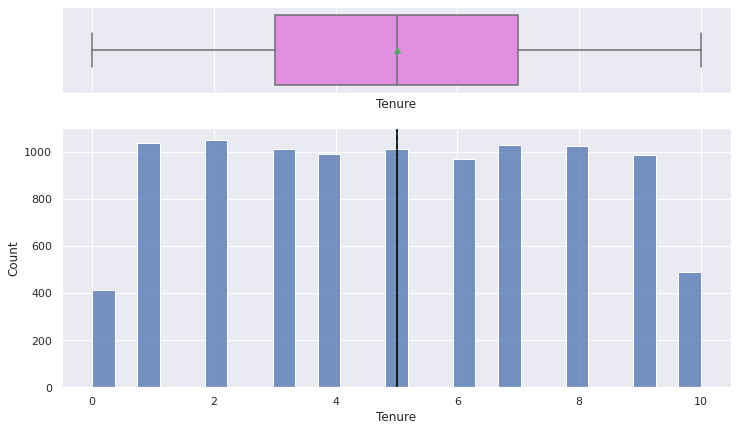

In [19]:
histogram_boxplot(data, "Tenure")

- The Median Tenure with the bank is 5 years, ranging from 0-10 years
- The IQR is between 3 and 7 with a mean of 5 years with the bank
- There is no outliers in Tenure
- Tenure is pretty evenly distributed at  about 10% for years 1-9 with the bank
- 4.1% of the bank customers have been with bank for 0 years
- 4.9% of the bank customers have been with bank for 10 years

**Observation on Balance**

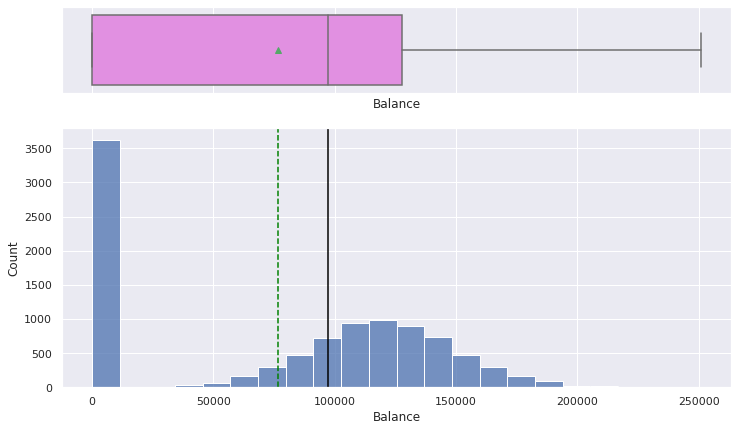

In [20]:
histogram_boxplot(data, "Balance")

- The Median balance with the bank is 97,199, customers balances ranging from 0 to 250,898
- The IQR is between 0 and 127,644 with a mean of 76,486 balance with the bank
- There is no outliers in customer balance

**Observation on NumOfProducts**

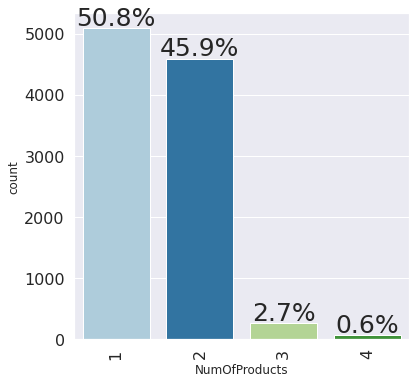

In [21]:
labeled_barplot(data, "NumOfProducts", 1, perc=True)

- 50.8% of the customers have purchased one product from the bank
- 45.9% of the customers have purchased two products from the bank
- 2.7% of the customers have purchased three products from the bank
- 0.6% of the customers have purchased four products from the bank

**Observation on HasCrCard**

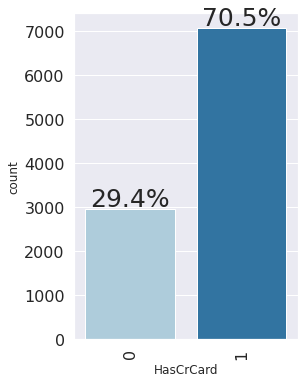

In [22]:
labeled_barplot(data, "HasCrCard", 1, perc=True)

- 29.4% of the bank's customers do not have a credit card
- 70.5% of the bank's customers have a credit card

**Observation on IsActiveMember**

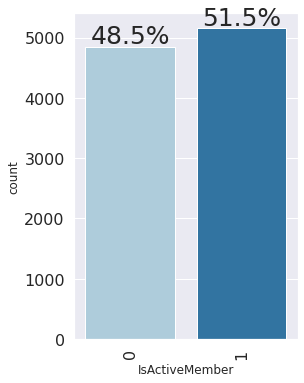

In [23]:
labeled_barplot(data, "IsActiveMember", 1, perc=True)

- 48.5% of the bank's customers are not an active member
- 51.5% of the bank's customers are an active member

**Observation on EstimatedSalary**

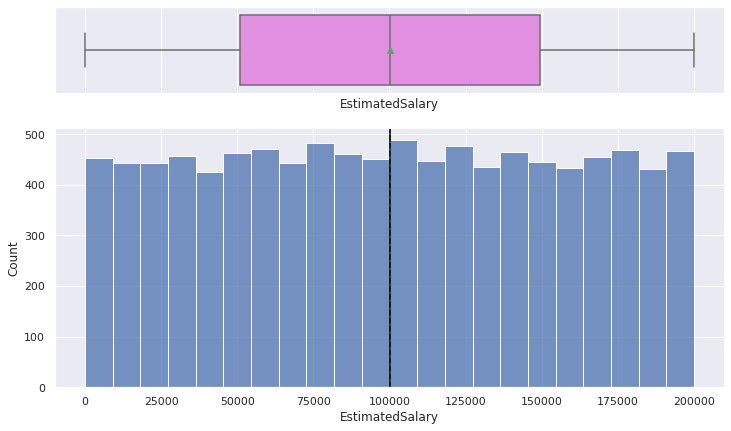

In [24]:
histogram_boxplot(data, "EstimatedSalary")

- The Median customer salary is 100,194, customers salaries ranging from 11.58 to 199,992
- The IQR of salaries is between 51,002 and 149,388 with a mean of 100,090 
- There is no outliers in customer salaries

**Observation on Exited**

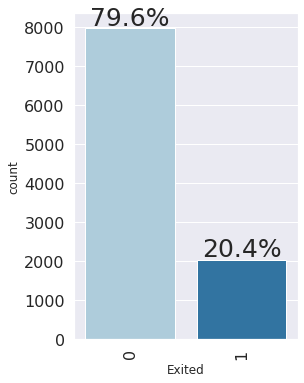

In [25]:
labeled_barplot(data, "Exited", 1, perc=True)

- 79.6% of the bank's customers are still with the bank
- 20.4% of the bank's customers have left the bank

### Bivariate Analysis

In [26]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target, figuresize=3):
    """
    Print the category counts and plot a stacked bar chart
    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, figuresize * 5))
    plt.xticks(rotation=90, fontsize=figuresize * 16)
    plt.yticks(fontsize=figuresize * 16)
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", prop={"size": 30}, bbox_to_anchor=(1, 1))
    plt.show()


# function to plot boxplot chart
def boxplot_chart(data_chart, x_axis, y_axis, x_rotation=0, figuresize=12):
    plt.figure(figsize=(15, 7))
    sns.boxplot(data=data_chart, x=x_axis, y=y_axis, palette="PuBu")
    plt.xticks(rotation=x_rotation, fontsize=figuresize)
    plt.show()


# function to plot stripplot chart
def stripplot_chart(data_chart, x_axis, y_axis, hue_chart):
    plt.figure(figsize=(40, 20))
    sns.stripplot(data=data_chart, x=x_axis, y=y_axis, hue=hue_chart, jitter=True)
    plt.xticks(rotation=90, fontsize=50)
    plt.yticks(fontsize=40)
    plt.ylabel(y_axis, fontsize=50)
    plt.legend(loc="upper left", prop={"size": 20}, bbox_to_anchor=(1, 1))
    plt.show()

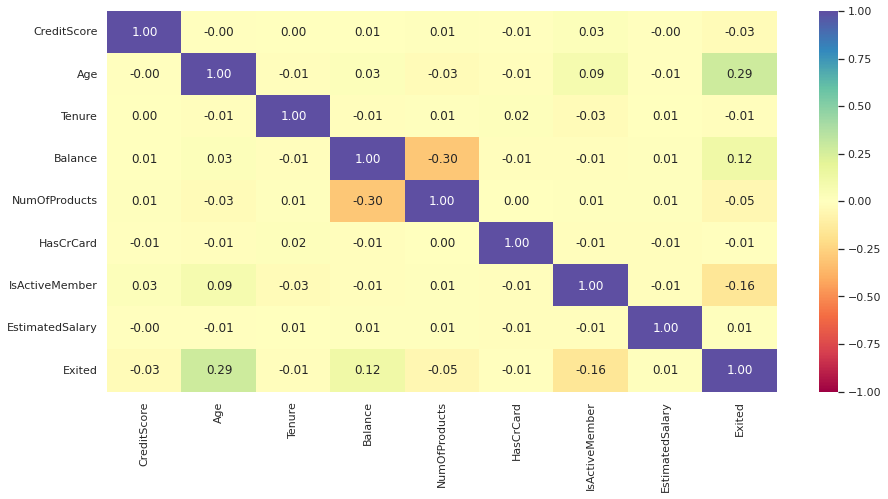

In [27]:
# Show heat map and correlation between variables
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- There is a small negitive correlation between Balance and NumOfProducts
- There is a small positive correlation between Age and Exited
- There is a very small negitive correlation between IsActiveMember and Exited
- There is a very small negitive correlation between Balance and Exited

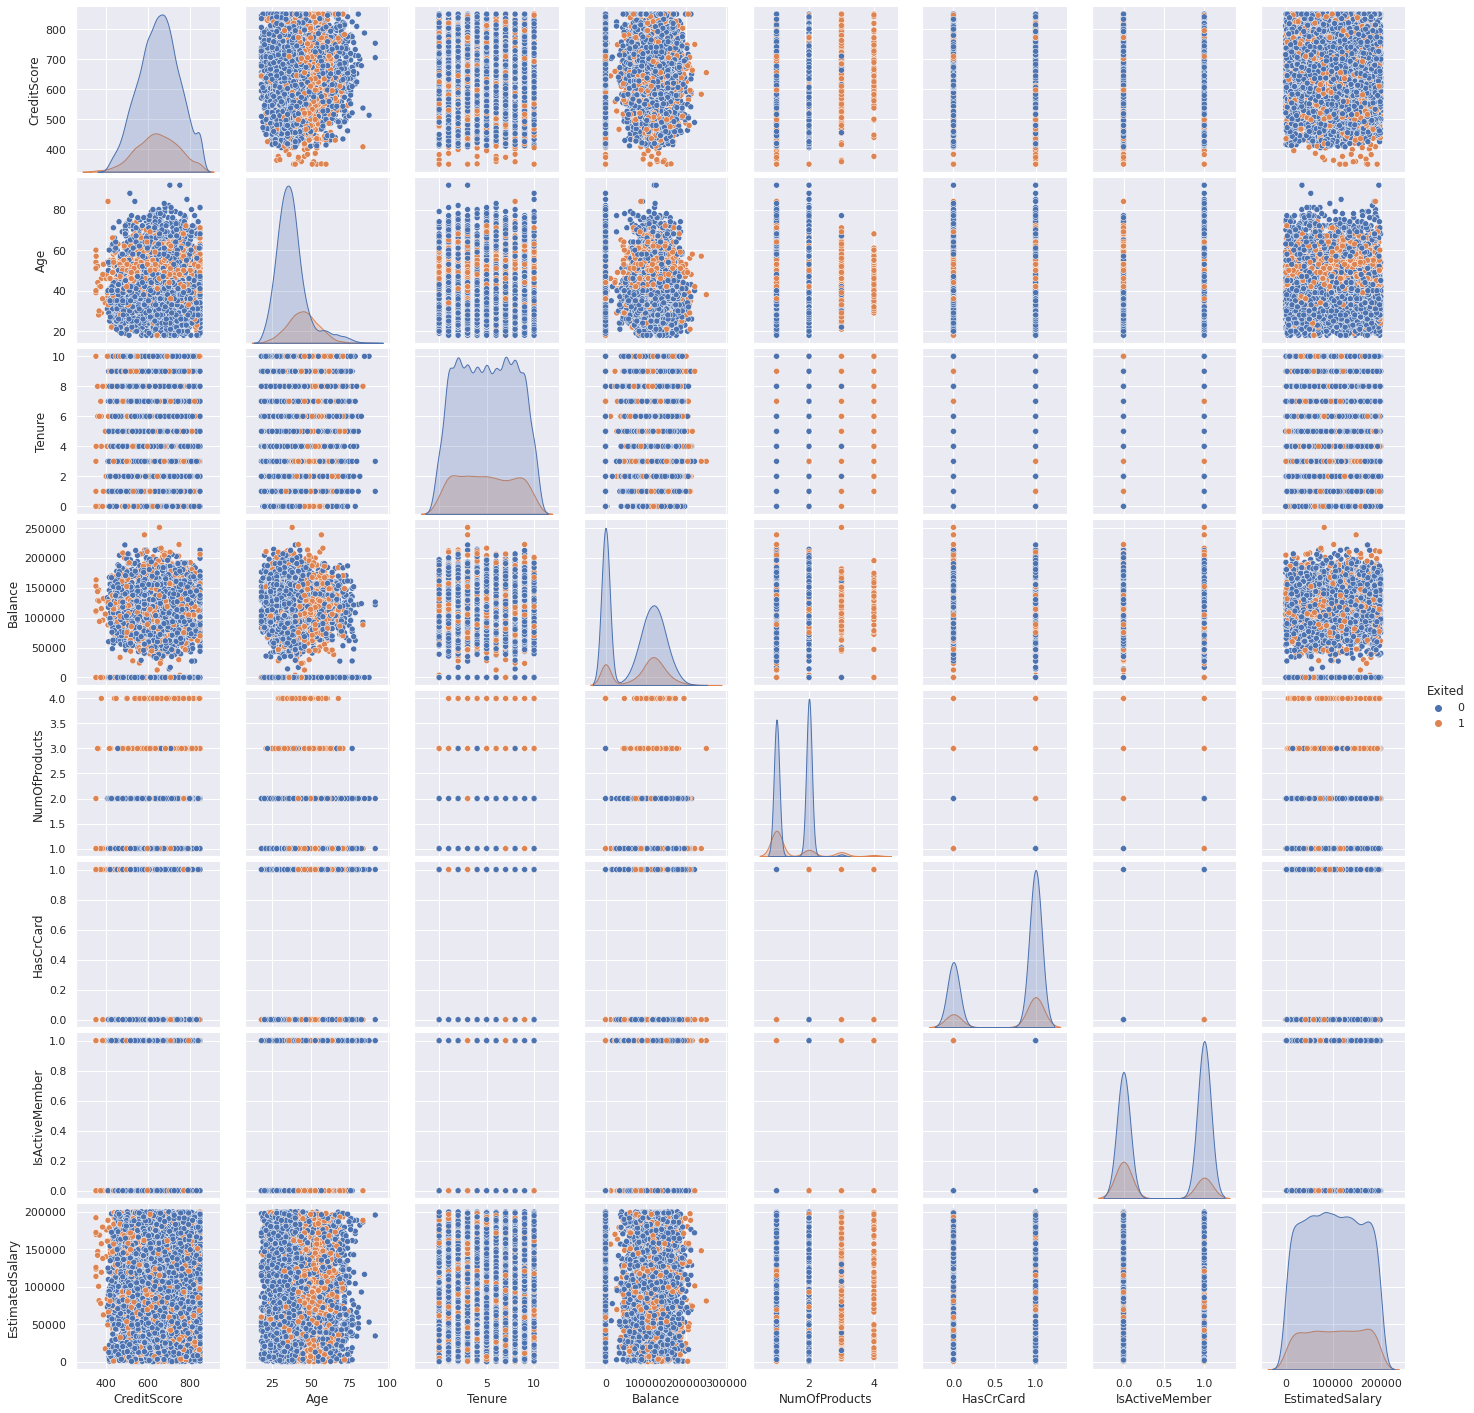

In [28]:
# show pairplot of dataset
sns.pairplot(data=data, hue="Exited", diag_kind="kde")
plt.show()

- Most of the customers that Exited the bank is between 40-60 years old
- The more the customers purchase products through the bank the more likely customer will Exited the bank
- Low Credit Score customers are more likely to Exited the bank compared to high credit score customers

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


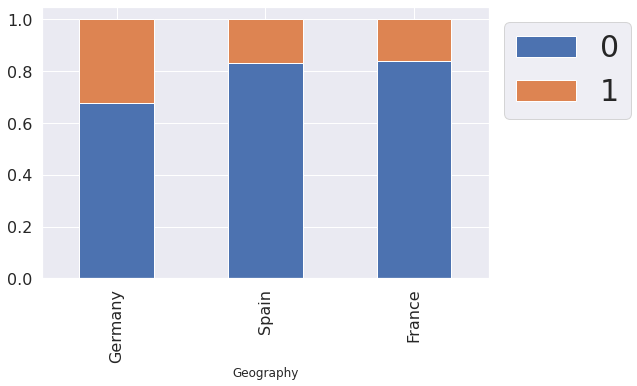

In [29]:
stacked_barplot(data, 'Geography', 'Exited', 1)

- If customers lives in Germany, they are more likely to Exited the bank compared to Spain and France

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


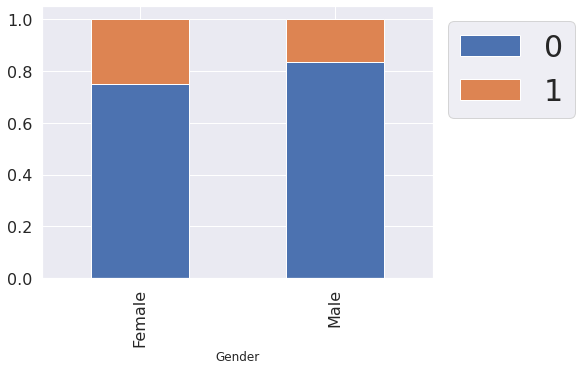

In [30]:
stacked_barplot(data, 'Gender', 'Exited', 1)

- Females are more likely to Exited the bank compared to Male customers

Exited     0     1    All
Age                      
All     7963  2037  10000
46       135    91    226
40       343    89    432
43       209    88    297
45       142    87    229
48        88    80    168
47        98    77    175
42       244    77    321
49        72    75    147
44       184    73    257
39       351    72    423
50        63    71    134
41       297    69    366
51        53    66    119
52        38    64    102
38       414    63    477
37       416    62    478
35       417    57    474
36       403    53    456
54        33    51     84
56        20    50     70
55        34    48     82
33       398    44    442
53        34    40     74
57        37    38     75
34       414    33    447
31       371    33    404
32       386    32    418
60        30    32     62
59        32    30     62
58        38    29     67
29       320    28    348
30       303    24    327
28       250    23    273
62        31    21     52
61        32    21     53
63        22

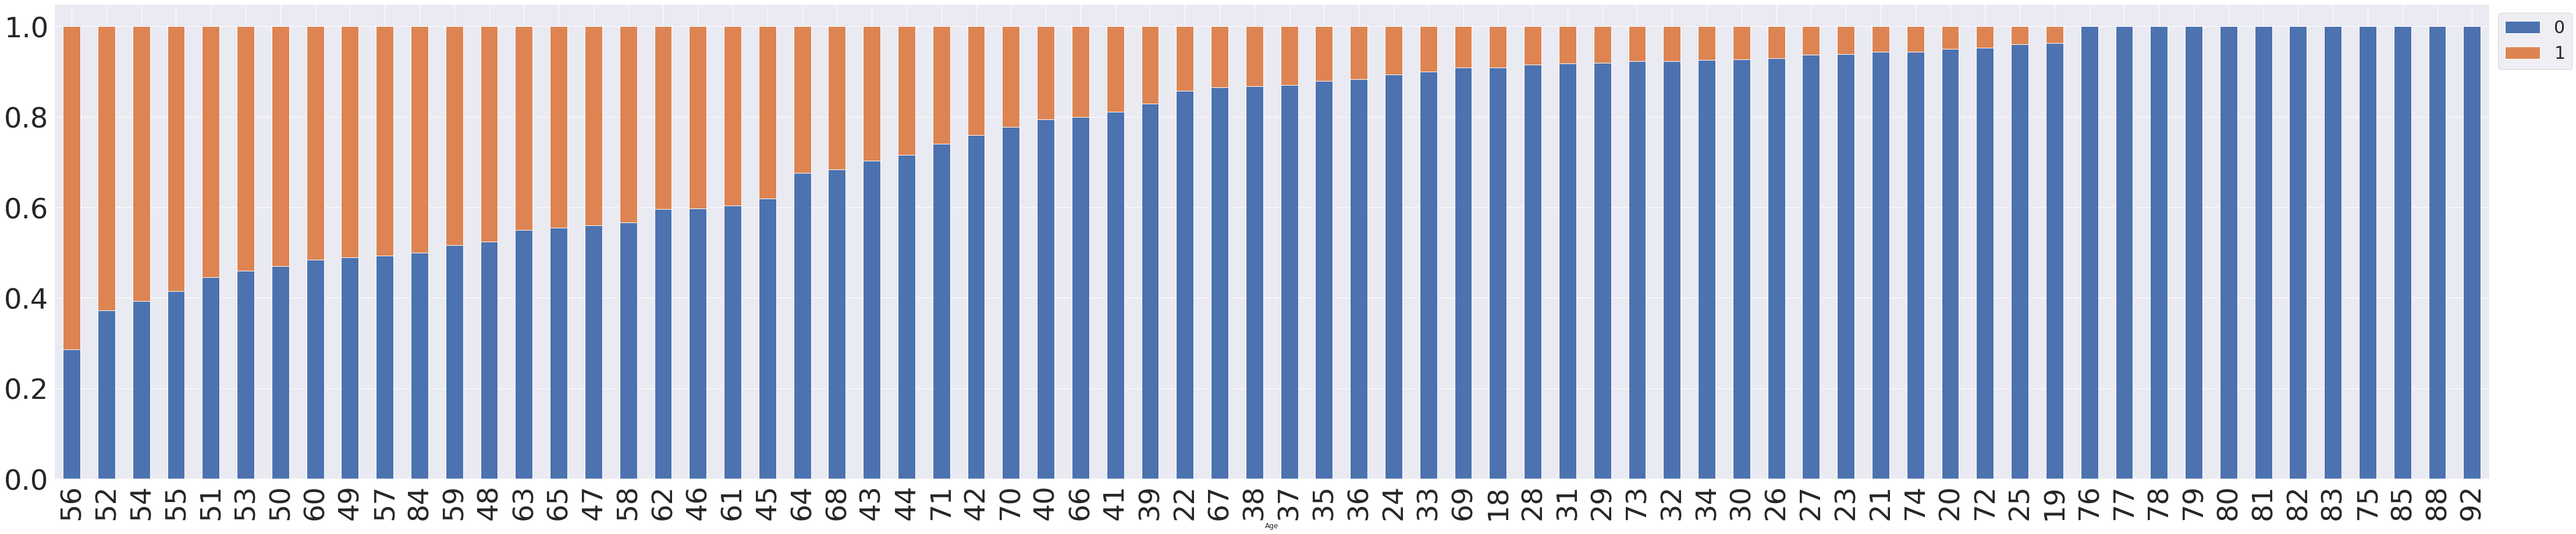

In [31]:
stacked_barplot(data, 'Age', 'Exited', 3)

- Customers are most likely to Exited the bank in there 50's

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


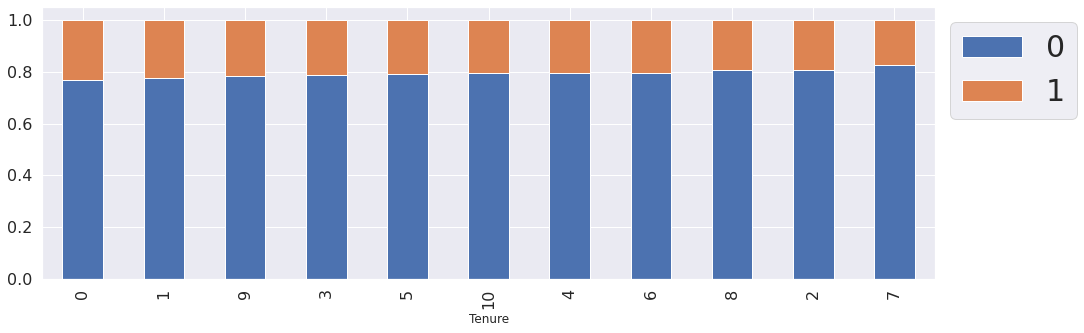

In [32]:
stacked_barplot(data, 'Tenure', 'Exited', 1)

- Number of years the customer been with the bank has no predictions on if the customer will Exited the bank

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


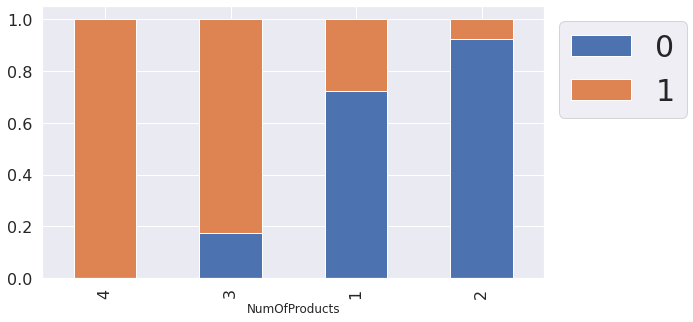

In [33]:
stacked_barplot(data, 'NumOfProducts', 'Exited', 1)

- If the customer purchased 4 or more products through the bank there is a very good chance customer will leave the bank

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


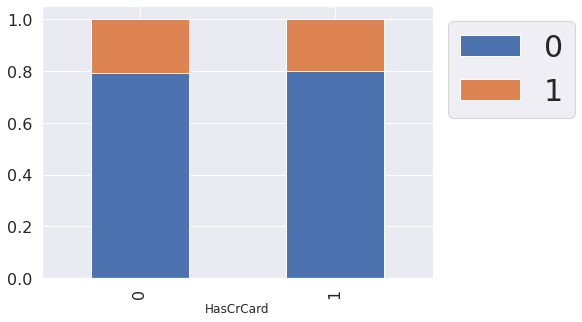

In [34]:
stacked_barplot(data, 'HasCrCard', 'Exited', 1)

- Customers that have a credit card or not has no predictions on if the customer will Exited the bank

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


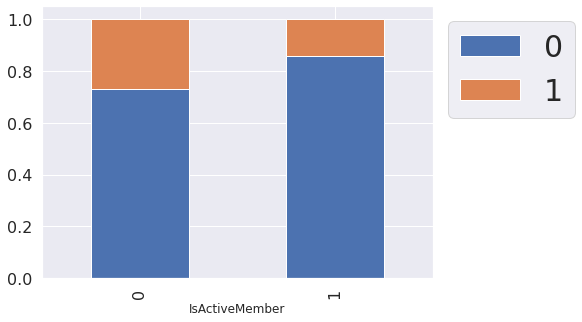

In [35]:
stacked_barplot(data, 'IsActiveMember', 'Exited', 1)

- If the customer is not an active member in the bank they are more likely to Exited the bank

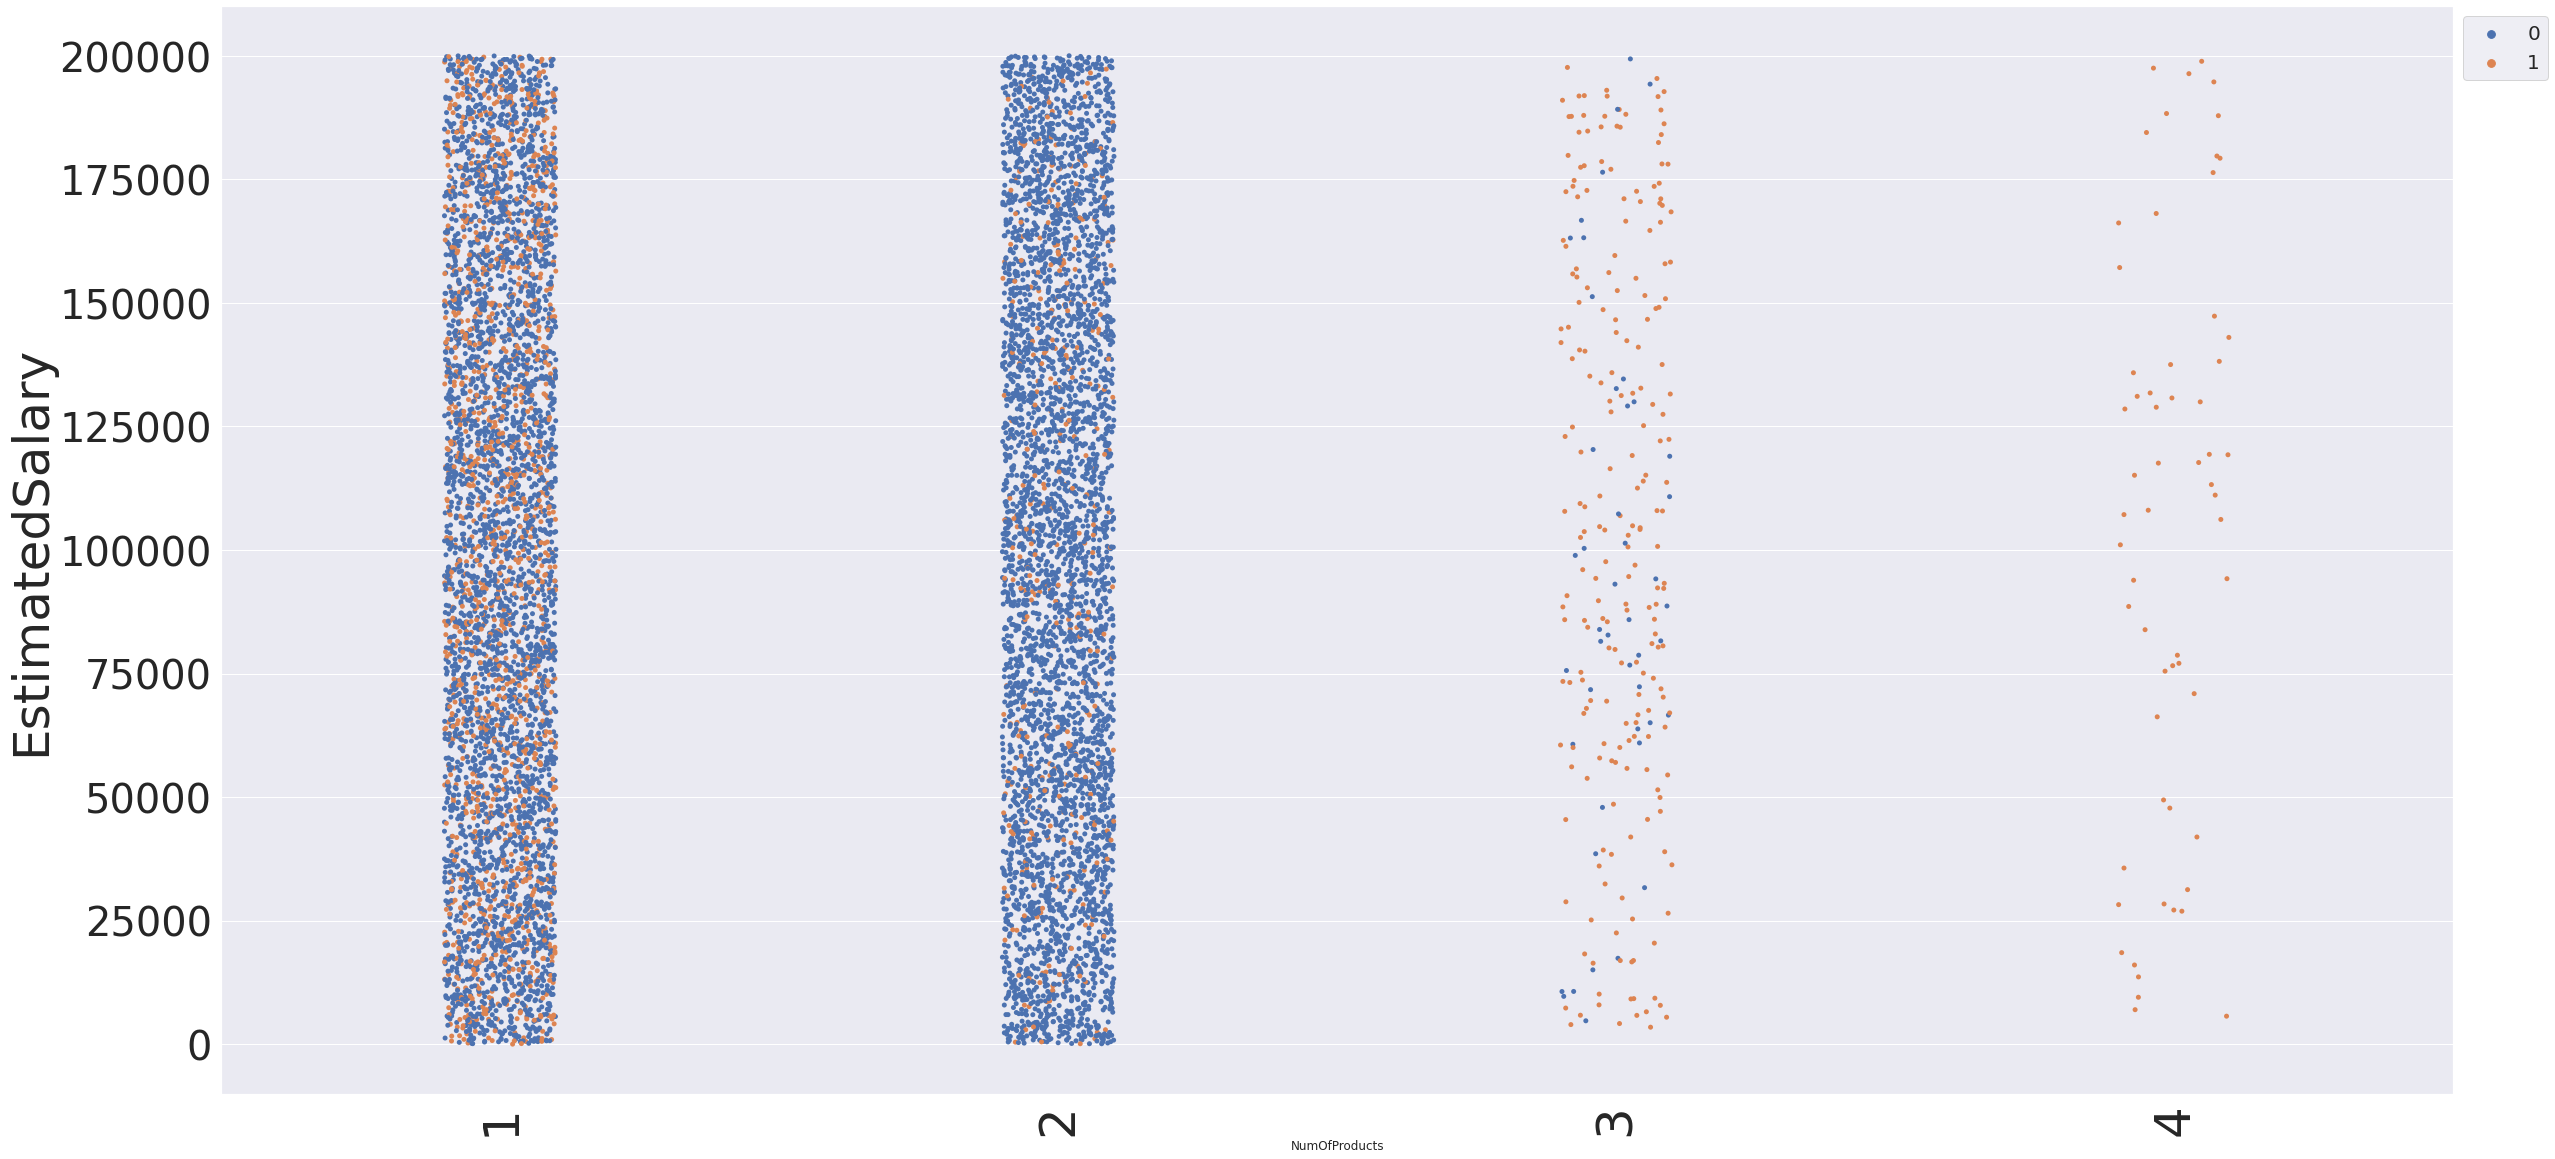

In [36]:
stripplot_chart(data, 'NumOfProducts', 'EstimatedSalary', 'Exited')

- Customer estimated salary has no predictions on if the customer will exited the bank

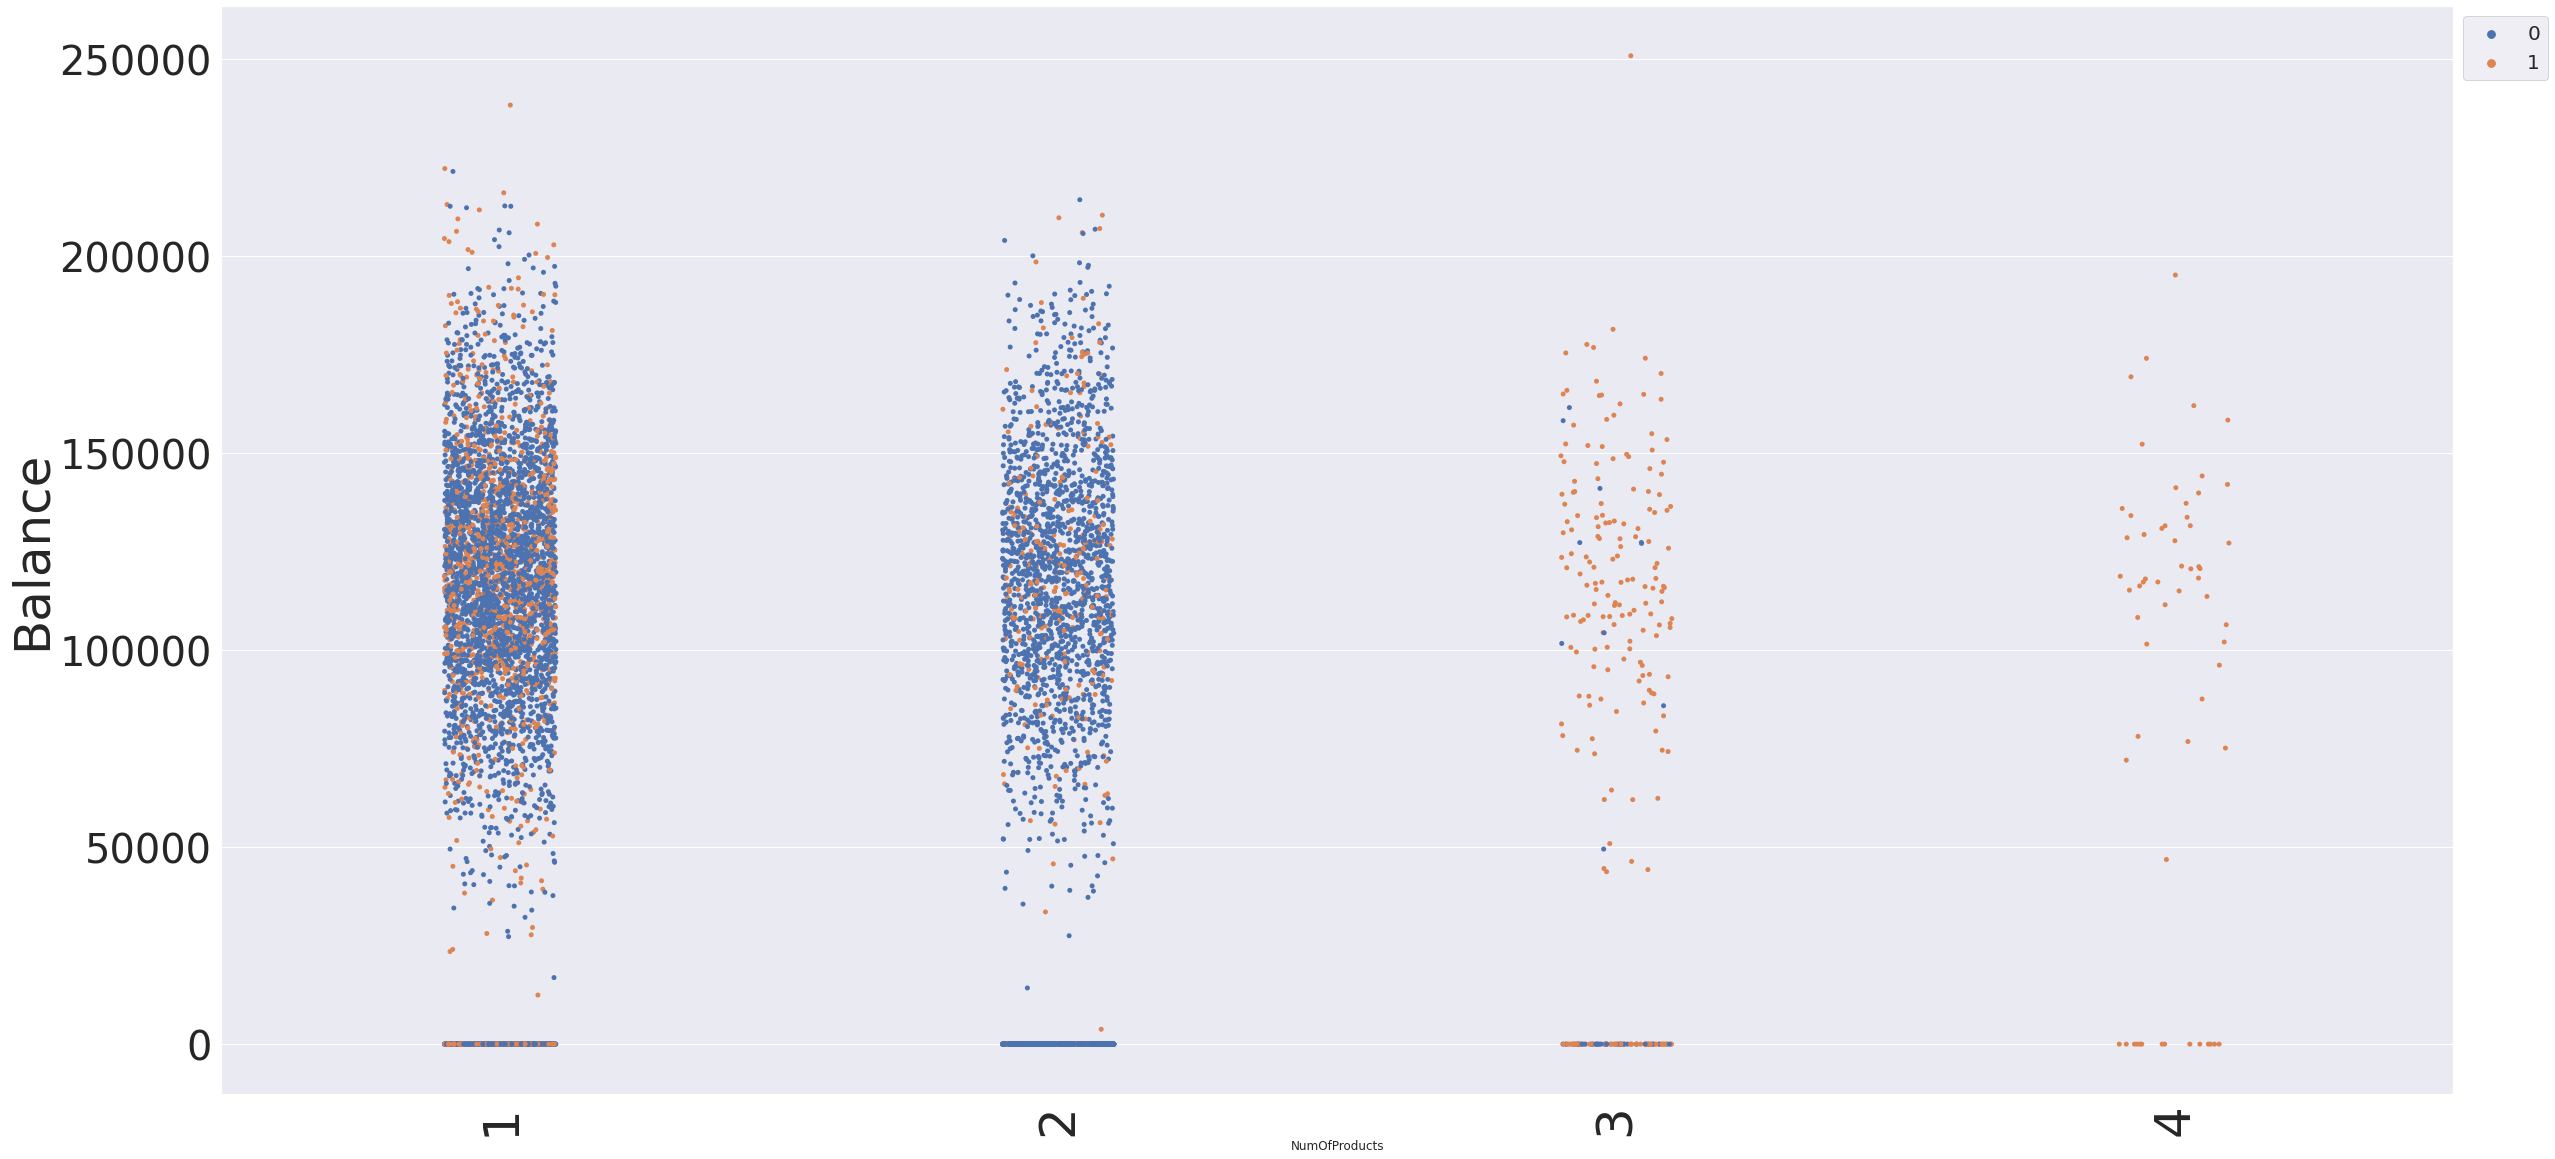

In [37]:
stripplot_chart(data, 'NumOfProducts', 'Balance', 'Exited')

- Customers balance with the bank has no predictions on if the customer will Exited the bank

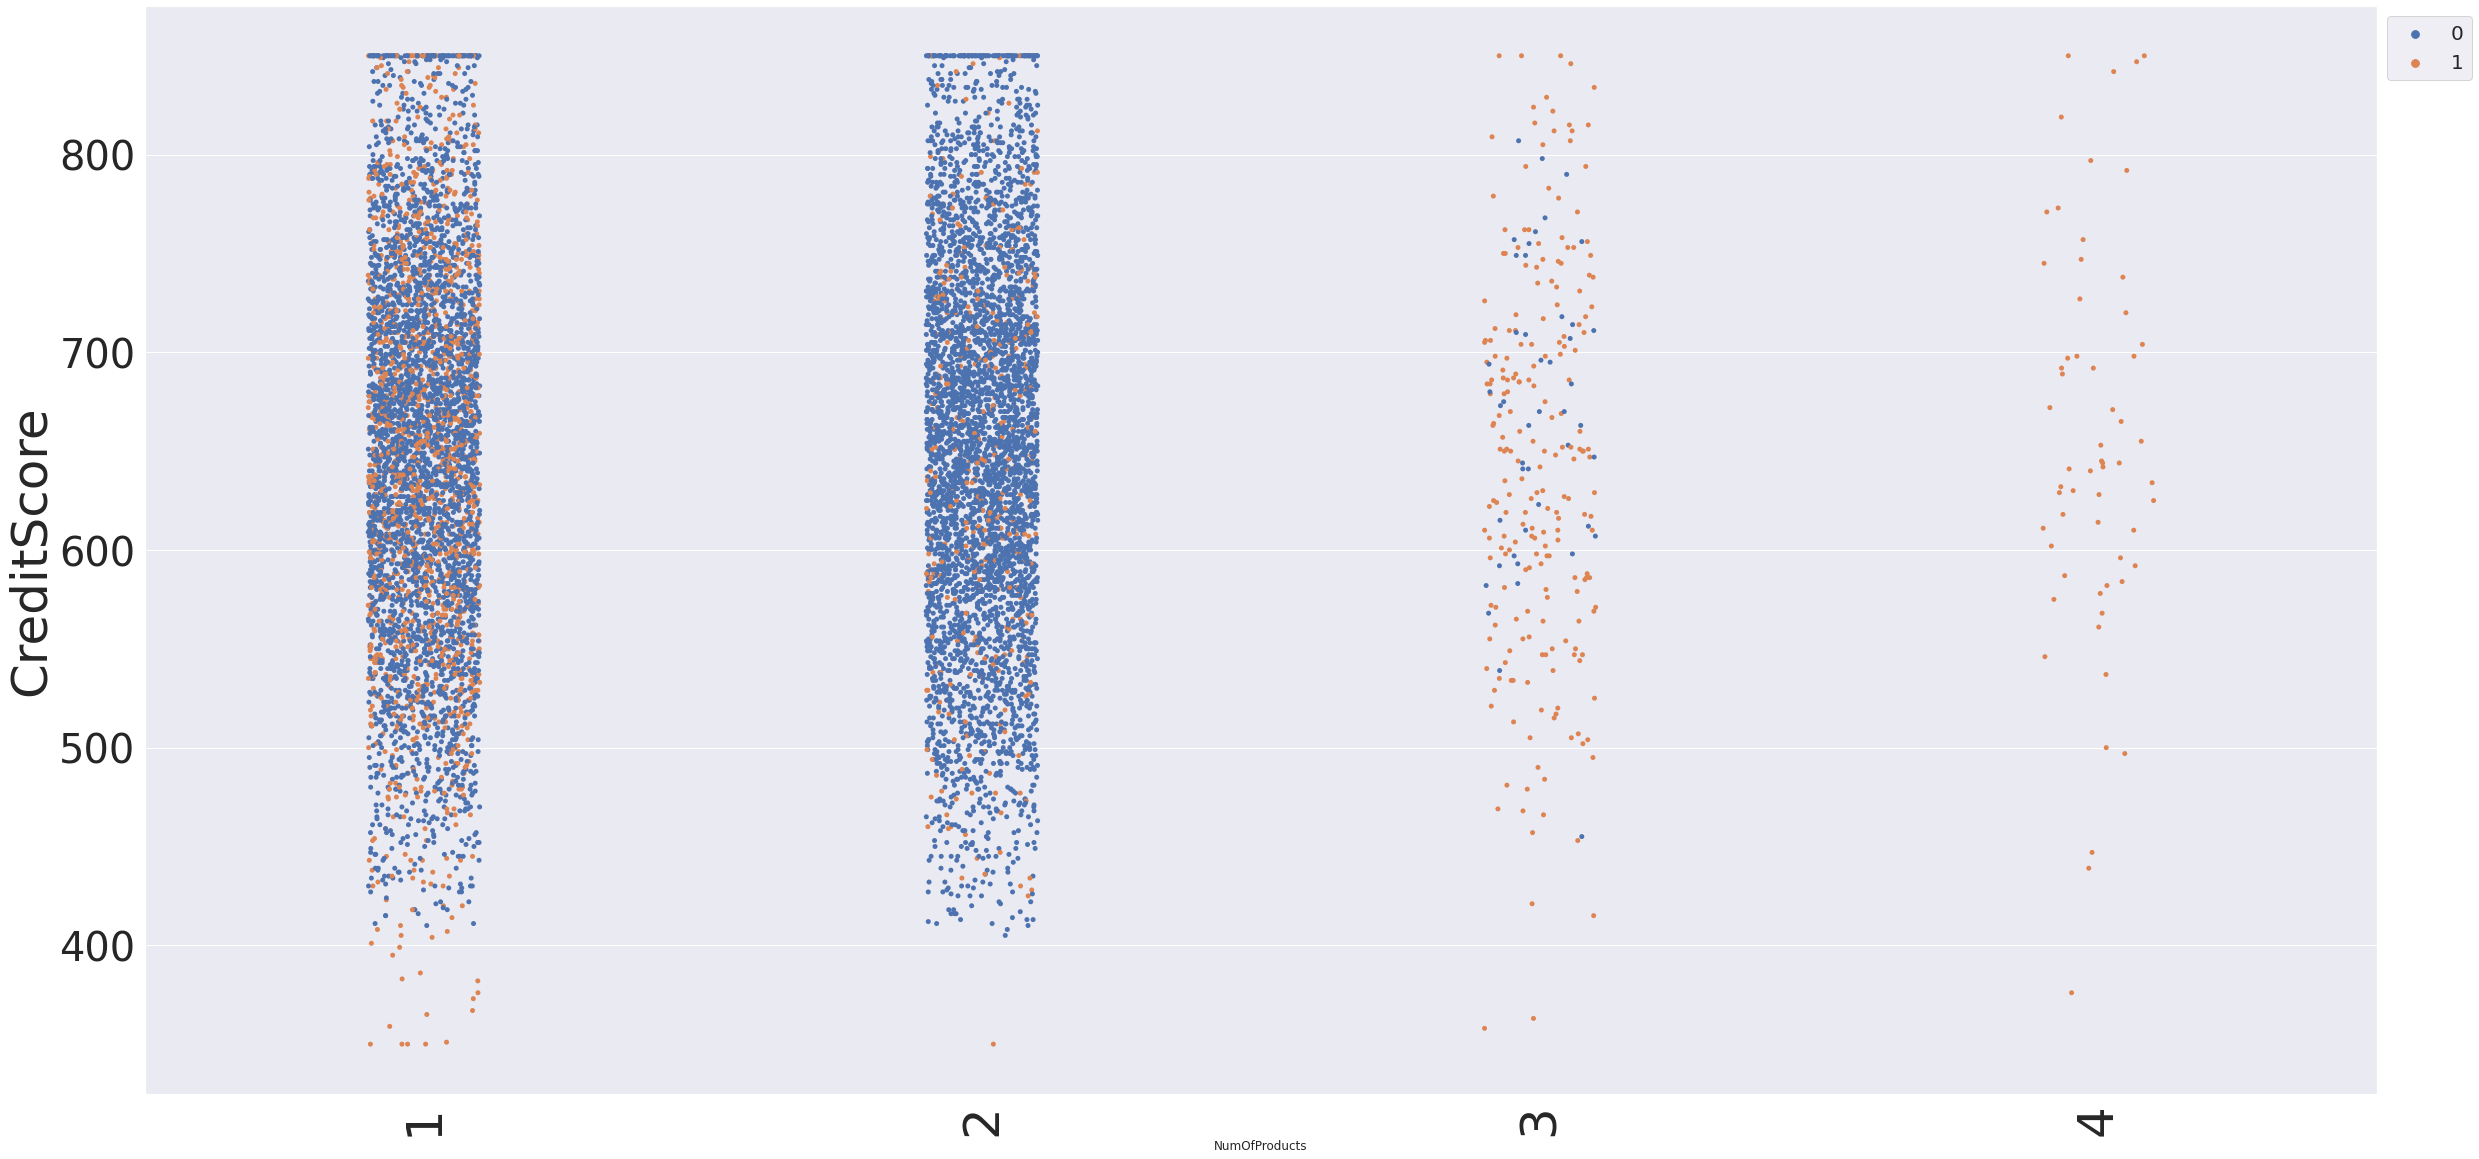

In [38]:
stripplot_chart(data, 'NumOfProducts', 'CreditScore', 'Exited')

- Credit score of 410 or lower will Exited the bank

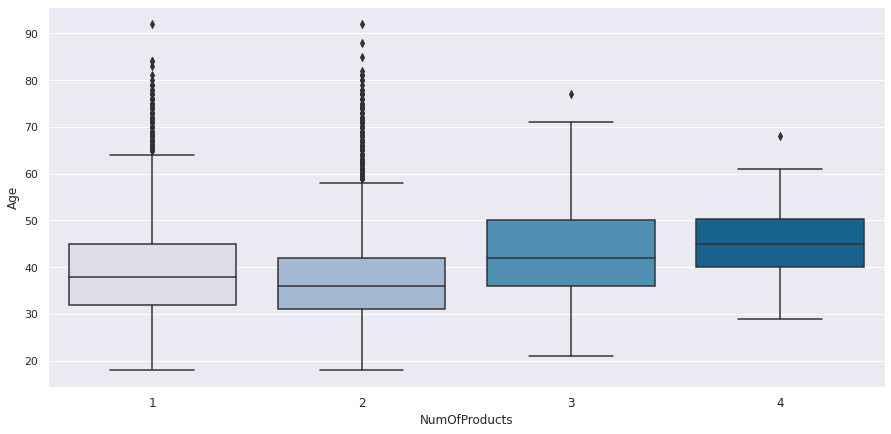

In [39]:
boxplot_chart(data, 'NumOfProducts', 'Age')

- The older customers are more likely to purchase more products then younger customers

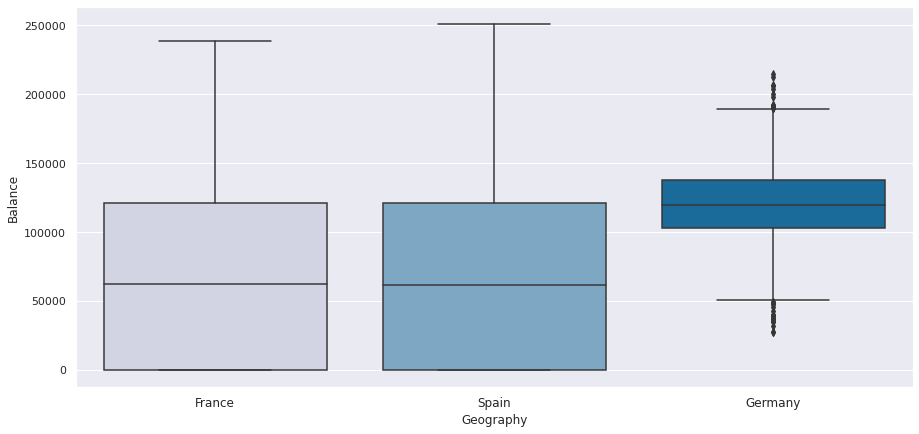

In [40]:
boxplot_chart(data, 'Geography', 'Balance')

- Germany bank customers have a higher bank balance than France and Spain bank customers

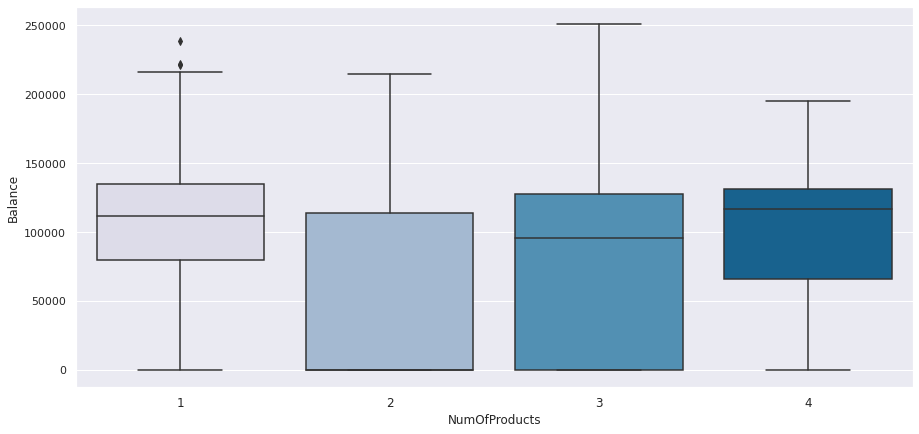

In [41]:
boxplot_chart(data, 'NumOfProducts', 'Balance')

- Customers that purchase 2 or 3 products have lower account balances than other customers

## Key observations on the relationship between variables:

- The Median credit score is 652, the lowest credit score is 350 and the highest credit score is 850.
- The IQR is between 584 and 718 with a mean of 651
- There is some outliers in credit score
- The credit score has a normal distribution
- 50.1% of the customers live in France
- 25.1% of the customers live in Germany
- 24.8% of the customers live in Spain
- 45.4% of the customers are Female
- 54.6% of the customers are Male
- The Median Age is 37 years old, youngest age is 18 and oldest is 92 years old
- The IQR is between age 32 and 44 with a mean of 39
- There is some outliers in age over 61 years old
- Age is right skewed
- The Median Tenure with the bank is 5 years, ranging from 0-10 years
- The IQR is between 3 and 7 with a mean of 5 years with the bank
- There is no outliers in Tenure
- Tenure is pretty evenly distributed at  about 10% for years 1-9 with the bank
- 4.1% of the bank customers have been with bank for 0 years
- 4.9% of the bank customers have been with bank for 10 years
- The Median balance with the bank is 97,199, customers balances ranging from 0 to 250,898
- The IQR is between 0 and 127,644 with a mean of 76,486 balance with the bank
- There is no outliers in customer balance
- 50.8% of the customers have purchased one product from the bank
- 45.9% of the customers have purchased two products from the bank
- 2.7% of the customers have purchased three products from the bank
- 0.6% of the customers have purchased four products from the bank
- 29.4% of the bank's customers do not have a credit card
- 70.5% of the bank's customers have a credit card
- 48.5% of the bank's customers are not an active member
- 51.5% of the bank's customers are an active member
- The Median customer salary is 100,194, customers salaries ranging from 11.58 to 199,992
- The IQR of salaries is between 51,002 and 149,388 with a mean of 100,090 
- There is no outliers in customer salaries
- 79.6% of the bank's customers are still with the bank
- 20.4% of the bank's customers have left the bank
- There is a small negitive correlation between Balance and NumOfProducts
- There is a small positive correlation between Age and Exited
- There is a very small negitive correlation between IsActiveMember and Exited
- There is a very small negitive correlation between Balance and Exited
- Most of the customers that Exited the bank is between 40-60 years old
- The more the customers purchase products through the bank the more likely customer will Exited the bank
- Low Credit Score customers are more likely to Exited the bank compared to high credit score customers
- If customers lives in Germany, they are more likely to Exited the bank compared to Spain and France
- Females are more likely to Exited the bank compared to Male customers
- Customers are most likely to Exited the bank in there 50's
- Number of years the customer been with the bank has no predictions on if the customer will Exited the bank
- If the customer purchased 4 or more products through the bank there is a very good chance customer will leave the bank
- Customers that have a credit card or not has no predictions on if the customer will Exited the bank
- If the customer is not an active member in the bank they are more likely to Exited the bank
- Customer estimated salary has no predictions on if the customer will exited the bank
- Customers balance with the bank has no predictions on if the customer will Exited the bank
- Credit score of 410 or lower will Exited the bank
- The older customers are more likely to purchase more products then younger customers
- Germany bank customers have a higher bank balance than France and Spain bank customers
- Customers that purchase 2 or 3 products have lower account balances than other customers

# Data Pre-processing


In [42]:
# Create a copy of data and call it "df"
df = data.copy()

In [43]:
# Create dummies for the County column in the dataset
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)
df.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1        101348.88       1                  0   
1               1        112542.58       0                  0   
2               0        113931.57       1                  0   
3               0         93826.63       0                  0   
4               1         79084.10       0                  0   

   Geography_Spain  Gender_Male  
0                0            0  
1                1            0  
2                0            0  
3                0            0  
4                1            0

In [44]:
## Scaling the data
sc=StandardScaler()
temp = sc.fit(df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']])
df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']] = temp.transform(df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']])
df.head()

CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
0    -0.326221  0.293517 -1.041760 -1.225848      -0.911583          1   
1    -0.440036  0.198164 -1.387538  0.117350      -0.911583          0   
2    -1.536794  0.293517  1.032908  1.333053       2.527057          1   
3     0.501521  0.007457 -1.387538 -1.225848       0.807737          0   
4     2.063884  0.388871 -1.041760  0.785728      -0.911583          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1         0.021886       1                  0   
1               1         0.216534       0                  0   
2               0         0.240687       1                  0   
3               0        -0.108918       0                  0   
4               1        -0.365276       0                  0   

   Geography_Spain  Gender_Male  
0                0            0  
1                1            0  
2                0            0  
3                0            0  
4                1            0

In [45]:
##Splitting Independent and dependent variable in X and Y respectively
X=df.drop(['Exited'],axis=1)
Y=df['Exited']

In [46]:
#printing the shape of the data 
print(X.shape)
print(Y.shape)

(10000, 11)
(10000,)


In [47]:
# Splitting the dataset into the Temp and Testing set.
X_temp, X_test, y_temp, y_test = train_test_split(X, Y, test_size = 0.1, stratify=Y, shuffle = True)

In [48]:
# Splitting the dataset into the Train and Validation set.
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size = 0.2, stratify=y_temp, shuffle = True)

In [49]:
# print the shape of models Train, Validation, and Test set
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(7200, 11) (1800, 11) (1000, 11)
(7200,) (1800,) (1000,)


#Model Building

- **The most important metrics to use for our models is Recall.  This is because the bank would be most concerned with the misclasification of the wrong predictions where we predicted customer would NOT Exited the bank but did.  Wrong predictions where we flagged customers would Exited the bank but didn't is not such a big deal as compared to the first case.  We will use recall for all our models.**

### Model 1

In [138]:
# Fixing the seed for random number generators
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

In [139]:
# We will be adding the layers sequentially
model1 = tf.keras.Sequential()
# Adding the hidden layers
model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model1.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer
model1.add(Dense(1, activation = 'sigmoid'))
# Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model1.compile(loss='binary_crossentropy',optimizer=optimizer, metrics=[tf.keras.metrics.Recall()])

In [140]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                768       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [141]:
history1 = model1.fit(X_train, y_train, batch_size=128, epochs=50, verbose=1, validation_data=(X_val, y_val))

Epoch 1/50
57/57 [==============================] - 1s 9ms/step - loss: 0.4819 - recall_2: 0.1044 - val_loss: 0.4261 - val_recall_2: 0.2480
Epoch 2/50
57/57 [==============================] - 0s 4ms/step - loss: 0.4070 - recall_2: 0.2681 - val_loss: 0.3992 - val_recall_2: 0.2970
Epoch 3/50
57/57 [==============================] - 0s 3ms/step - loss: 0.3822 - recall_2: 0.3527 - val_loss: 0.3866 - val_recall_2: 0.4142
Epoch 4/50
57/57 [==============================] - 0s 4ms/step - loss: 0.3694 - recall_2: 0.4134 - val_loss: 0.3774 - val_recall_2: 0.4087
Epoch 5/50
57/57 [==============================] - 0s 3ms/step - loss: 0.3600 - recall_2: 0.4345 - val_loss: 0.3723 - val_recall_2: 0.4060
Epoch 6/50
57/57 [==============================] - 0s 3ms/step - loss: 0.3532 - recall_2: 0.4570 - val_loss: 0.3707 - val_recall_2: 0.4496
Epoch 7/50
57/57 [==============================] - 0s 3ms/step - loss: 0.3486 - recall_2: 0.4557 - val_loss: 0.3706 - val_recall_2: 0.4687
Epoch 8/50
57/57 [==

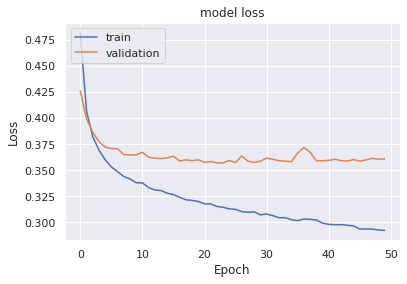

In [142]:
#Plotting Train Loss vs Validation Loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

- **Model1 is overfitting the training dataset**

32/32 [==============================] - 0s 2ms/step
Best Threshold=0.198674, G-Mean=0.775


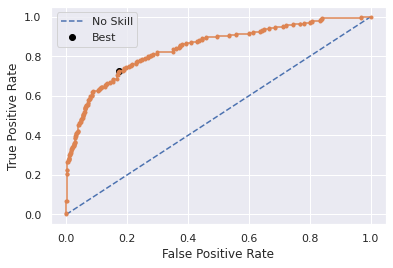

In [143]:
# predict probabilities
yhat1 = model1.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [144]:
#Predicting the results using best as a threshold
y_pred_e1=model1.predict(X_test)
y_pred_e1 = (y_pred_e1 > thresholds1[ix])

32/32 [==============================] - 0s 2ms/step


Text(0.5, 12.5, 'Predicted label')

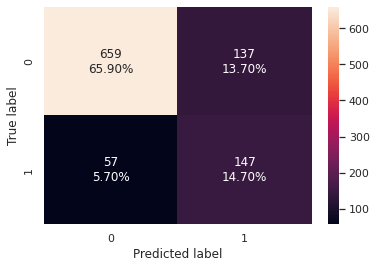

In [145]:
#Calculating the confusion matrix 
cm1=metrics.confusion_matrix(y_test, y_pred_e1)
labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm1.flatten().sum())]
            for item in cm1.flatten()
        ]
    ).reshape(2, 2)

plt.figure(figsize=(6, 4))
sns.heatmap(cm1, annot=labels, fmt="")
plt.ylabel("True label")
plt.xlabel("Predicted label")

In [146]:
#Accuracy as per the classification report 
cr1=metrics.classification_report(y_test,y_pred_e1)
print(cr1)

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       796
           1       0.52      0.72      0.60       204

    accuracy                           0.81      1000
   macro avg       0.72      0.77      0.74      1000
weighted avg       0.84      0.81      0.82      1000



-**The accuracy of the model is pretty good at 81% but we had 57 misclassified False Negitives in which we predicted the customer did NOT Exited the bank but did.  The Recall is just 72% and the model is overfitted with the training dataset.  We can use things like Dropout and Batch Normalization to prevent overfitting and implement these improvements to create better models.**

## Model 2

In [183]:
# Fixing the seed for random number generators
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [184]:
# We will be adding the layers sequentially
model2 = tf.keras.Sequential()
# Adding the hidden layers
model2.add(Dense(64,activation='relu', kernel_initializer='he_uniform', input_dim = X_train.shape[1]))
model2.add(Dropout(0.3))
model2.add(Dense(32,activation='relu', kernel_initializer='he_uniform'))
model2.add(Dropout(0.3))
# Adding the output layer
model2.add(Dense(1, activation = 'sigmoid'))
# Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model2.compile(loss='binary_crossentropy',optimizer=optimizer, metrics=[tf.keras.metrics.Recall()])

In [185]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [186]:
history2 = model2.fit(X_train, y_train, batch_size=128, epochs=50, verbose=1, validation_data=(X_val, y_val))

Epoch 1/50
57/57 [==============================] - 1s 9ms/step - loss: 0.5885 - recall: 0.1664 - val_loss: 0.4442 - val_recall: 0.2016
Epoch 2/50
57/57 [==============================] - 0s 4ms/step - loss: 0.5014 - recall: 0.2087 - val_loss: 0.4226 - val_recall: 0.1907
Epoch 3/50
57/57 [==============================] - 0s 3ms/step - loss: 0.4691 - recall: 0.2128 - val_loss: 0.4089 - val_recall: 0.2752
Epoch 4/50
57/57 [==============================] - 0s 4ms/step - loss: 0.4495 - recall: 0.2531 - val_loss: 0.4024 - val_recall: 0.3243
Epoch 5/50
57/57 [==============================] - 0s 3ms/step - loss: 0.4389 - recall: 0.2824 - val_loss: 0.3948 - val_recall: 0.3433
Epoch 6/50
57/57 [==============================] - 0s 4ms/step - loss: 0.4255 - recall: 0.2885 - val_loss: 0.3891 - val_recall: 0.3678
Epoch 7/50
57/57 [==============================] - 0s 4ms/step - loss: 0.4193 - recall: 0.3172 - val_loss: 0.3848 - val_recall: 0.4005
Epoch 8/50
57/57 [==============================

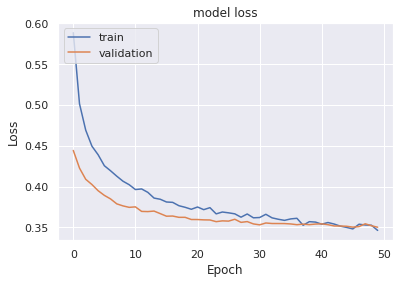

In [187]:
#Plotting Train Loss vs Validation Loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

32/32 [==============================] - 0s 1ms/step
Best Threshold=0.231367, G-Mean=0.775


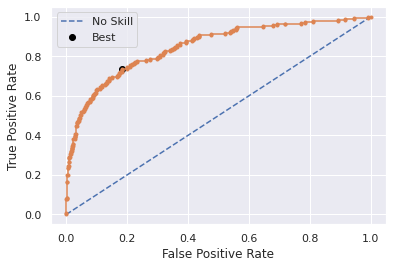

In [188]:
# predict probabilities
yhat1 = model2.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [189]:
#Predicting the results using best as a threshold
y_pred_e2=model2.predict(X_test)
y_pred_e2 = (y_pred_e2 > thresholds1[ix])

32/32 [==============================] - 0s 1ms/step


Text(0.5, 12.5, 'Predicted label')

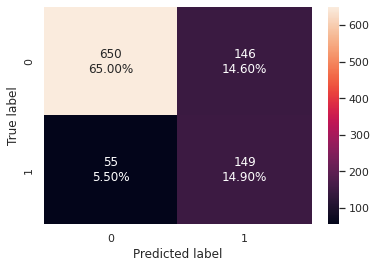

In [190]:
#Calculating the confusion matrix 
cm2=metrics.confusion_matrix(y_test, y_pred_e2)
labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm2.flatten().sum())]
            for item in cm2.flatten()
        ]
    ).reshape(2, 2)

plt.figure(figsize=(6, 4))
sns.heatmap(cm2, annot=labels, fmt="")
plt.ylabel("True label")
plt.xlabel("Predicted label")

In [191]:
#Accuracy as per the classification report 
cr2=metrics.classification_report(y_test,y_pred_e2)
print(cr2)

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       796
           1       0.51      0.73      0.60       204

    accuracy                           0.80      1000
   macro avg       0.71      0.77      0.73      1000
weighted avg       0.84      0.80      0.81      1000



- **Accuracy is still pretty good at 80% but the most important thing is that Recall score went up to 73%.  There is only 55 compared to 57 that was misclassified as NOT Exited the bank but did.  Model2 is a better model than model1**

## Model 3

In [249]:
# Fixing the seed for random number generators
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [250]:
# We will be adding the layers sequentially
model3 = tf.keras.Sequential()
# Adding the hidden layers
model3.add(Dense(64,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model3.add(Dropout(.3))
model3.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model3.add(tf.keras.layers.BatchNormalization())
# Adding the output layer
model3.add(Dense(1, activation = 'sigmoid'))
# Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model3.compile(loss='binary_crossentropy',optimizer=optimizer, metrics=[tf.keras.metrics.Recall()])

In [251]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,009
Trainable params: 2,945
Non-trainable params: 64
_____________________________________________________

In [252]:
history3 = model3.fit(X_train, y_train, batch_size=128, epochs=50, verbose=1, validation_data=(X_val, y_val))

Epoch 1/50
57/57 [==============================] - 1s 9ms/step - loss: 0.6967 - recall: 0.6037 - val_loss: 0.5158 - val_recall: 0.5504
Epoch 2/50
57/57 [==============================] - 0s 3ms/step - loss: 0.5381 - recall: 0.5034 - val_loss: 0.4638 - val_recall: 0.5368
Epoch 3/50
57/57 [==============================] - 0s 3ms/step - loss: 0.4590 - recall: 0.4209 - val_loss: 0.4099 - val_recall: 0.4986
Epoch 4/50
57/57 [==============================] - 0s 4ms/step - loss: 0.4217 - recall: 0.3820 - val_loss: 0.3868 - val_recall: 0.4877
Epoch 5/50
57/57 [==============================] - 0s 5ms/step - loss: 0.4057 - recall: 0.3574 - val_loss: 0.3731 - val_recall: 0.4441
Epoch 6/50
57/57 [==============================] - 0s 4ms/step - loss: 0.3926 - recall: 0.3649 - val_loss: 0.3669 - val_recall: 0.4469
Epoch 7/50
57/57 [==============================] - 0s 5ms/step - loss: 0.3907 - recall: 0.3615 - val_loss: 0.3609 - val_recall: 0.4005
Epoch 8/50
57/57 [==============================

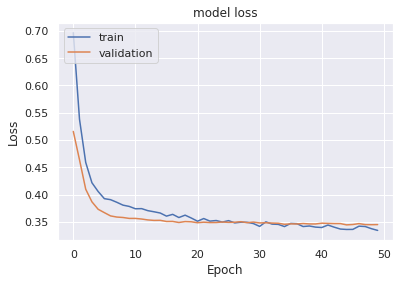

In [253]:
#Plotting Train Loss vs Validation Loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

32/32 [==============================] - 0s 1ms/step
Best Threshold=0.197088, G-Mean=0.788


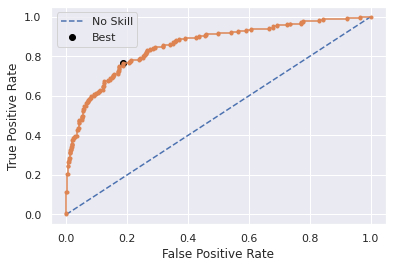

In [254]:
# predict probabilities
yhat1 = model3.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [255]:
#Predicting the results using best as a threshold
y_pred_e3=model2.predict(X_test)
y_pred_e3 = (y_pred_e3 > thresholds1[ix])

32/32 [==============================] - 0s 1ms/step


Text(0.5, 12.5, 'Predicted label')

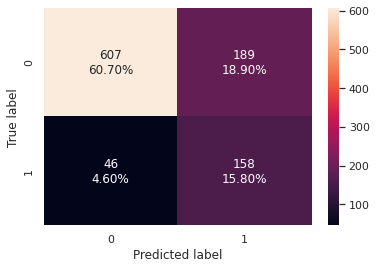

In [256]:
#Calculating the confusion matrix 
cm3=metrics.confusion_matrix(y_test, y_pred_e3)
labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm3.flatten().sum())]
            for item in cm3.flatten()
        ]
    ).reshape(2, 2)

plt.figure(figsize=(6, 4))
sns.heatmap(cm3, annot=labels, fmt="")
plt.ylabel("True label")
plt.xlabel("Predicted label")

In [257]:
#Accuracy as per the classification report 
cr3=metrics.classification_report(y_test,y_pred_e3)
print(cr3)

              precision    recall  f1-score   support

           0       0.93      0.76      0.84       796
           1       0.46      0.77      0.57       204

    accuracy                           0.77      1000
   macro avg       0.69      0.77      0.71      1000
weighted avg       0.83      0.77      0.78      1000



- **Accuracy is still pretty good at 77% but the most important thing is that Recall score went up to 77% as well.  There is only 46 compared to 57 that was misclassified as NOT Exited the bank but did.  Model3 is a better model than both model1 and model2**

# Insights & Business Recommendations for the Bank

- **The best model of the three models is model 3.  It is not overfitting the training dataset and accuracy and recall are the same at 77%.  Model 3 is the model the bank should use to predict if customers will churn.**
- Most of the customers that Exited the bank is between Age 40-60 years old.  The bank should target these customers as they are more likely to leave the bank.
- Customers that are in their 50's are especially likely to leave the bank the most and special promotions should be given to this customers to keep them banking with the bank.
- Low credit score customers are more likely to Exited the bank compared to high credit score customers.  Special care should be given for customers with credit score 410 and below as they are very likely to Exited the bank.  Bank could reach out to these customers to try helping them raising their credit score.  It will be better for both the bank and customer if they do so.
- Customers that live in Germany are more likely to Exited the bank compared to Spain and France.  More research should be done to see why Germans Exited the bank compared to Spain and France.  Maybe see how Spain and France customers differ from Germany.  Find ways to change or correct this trend.  The data shows that German customers have a higher bank balance compared to France and Spain customers as well.
- If the customer is not an active member in the bank they are more likely to leave the bank.  Try reaching out to these customers to make them more active with the bank.  The data also shows females are more likely to leave the bank compared to males.  